In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

In [210]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(20190730)
tf.set_random_seed(20190730)

# 데이터 전처리

- 변수 설명
    - y = 응답 변수로 이진 변수 인 기본 지불 (예 : 1, 아니오 = 0)을 사용했습니다
    - X1 : 주어진 크레딧 금액 (NT 달러) : 개인 소비자 크레딧과 가족 (보충) 크레딧을 모두 포함합니다.
    - X2 : 성별 (1 = 남성, 2 = 여성).
    - X3 : 교육 (1 = 대학원, 2 = 대학, 3 = 고등학생, 4 = 기타).
    - X4 : 결혼 상태 (1 = 결혼; 2 = 단일; 3 = 기타).
    - X5 : 나이 (년).
    - X6 - X11 : 과거 지불 내역. 우리는 과거의 월별 지불 기록 (2005 년 4 월에서 9 월까지)을 다음과 같이 추적했습니다 : X6 = 2005 년 9 월의 상환 상태; X7 = 2005 년 8 월 상환 상태; . . X11 = 2005 년 4 월의 상환 상태. 상환 상태의 측정 척도는 다음과 같습니다. -1 = 정당한 대가; 1 = 지불 지연 1 개월; 2 = 2 개월 지불 지연; . . .; 8 = 8 개월 지불 지연; 9 = 9 개월 이상 지불 지연.
    - X12-X17 : 청구 명세서 금액 (NT 달러). X12 = 2005 년 9 월 청구서 명세서 금액; X13 = 2005 년 8 월 청구 명세서 명세서 금액; . . .; X17 = 2005 년 4 월 청구 명세서 금액
    - X18 - X23 : 이전 지불 금액 (NT 달러). X18 = 2005 년 9 월 지급액; X19 = 2005 년 8 월 지급 된 금액; . . ; X23 = 2005 년 4 월 지급액.
    
- 연속형 범주형 분류
    - 연속형 : X1, X12-23
    - 범주형 : X2-X11

In [6]:
data.iloc[:,6:12].isin([0,-2]).sum()

PAY_0    17496
PAY_2    19512
PAY_3    19849
PAY_4    20803
PAY_5    21493
PAY_6    21181
dtype: int64

In [334]:
import pandas as pd
data = pd.read_csv('UCI_Credit_Card.csv', header = 0)
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [335]:
data.shape

(30000, 25)

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [337]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- 현 시점에서의 문제점 도출

    1. EDUCATION, MARRIAGE의 이상치 처리 (0, 5, 6)
    2. PAY 변수에서 설명되지 않은 -2와 0에 대한 처리 방법

#### EDUCATION, MARRIAGE의 이상치 처리

    data description에 없는 0, 5, 6 데이터 관측치 수의 경우
    30000개의 데이터중 1%정도의 불과하여 obs를 제거하는 방식 채택

In [338]:
columns_list = data.columns

for col in columns_list:
    print(col, ':', sum(data[col] == 0))

ID : 0
LIMIT_BAL : 0
SEX : 0
EDUCATION : 14
MARRIAGE : 54
AGE : 0
PAY_0 : 14737
PAY_2 : 15730
PAY_3 : 15764
PAY_4 : 16455
PAY_5 : 16947
PAY_6 : 16286
BILL_AMT1 : 2008
BILL_AMT2 : 2506
BILL_AMT3 : 2870
BILL_AMT4 : 3195
BILL_AMT5 : 3506
BILL_AMT6 : 4020
PAY_AMT1 : 5249
PAY_AMT2 : 5396
PAY_AMT3 : 5968
PAY_AMT4 : 6408
PAY_AMT5 : 6703
PAY_AMT6 : 7173
default.payment.next.month : 23364


In [339]:
# 범주형 변수들의 class 조회
print(data['SEX'].unique(),
      data['EDUCATION'].unique(),
      data['MARRIAGE'].unique())

[2 1] [2 1 3 5 4 6 0] [1 2 3 0]


EDUCATION : (1 = 대학원, 2 = 대학, 3 = 고등학생, 4 = 기타).

MARRIAGE : (1 = 결혼; 2 = 단일; 3 = 기타).

하지만 EDUCATION에는 5,6,0

MARRIAGE에는 0 이 들어있음

In [340]:
data['EDUCATION'].isin([5,6,0]).sum()

345

In [341]:
data['MARRIAGE'].isin([0]).sum()

54

In [342]:
# EDUCATION과 MARRIAGE의 결측값들 중 중복되는 관측값은 없는지 확인
sum(data[(data['EDUCATION'] == 5)|(data['EDUCATION'] == 6) |(data['EDUCATION'] == 0)]['MARRIAGE'] == 0)

0

dataset 전체의 obs대비 1.33%($\frac{345+54}{30000} *100$)정도의 비율로 적은 갯수라 판단하여 관측값 제거 선택

In [343]:
df = data[(data['EDUCATION'] != 5) & (data['EDUCATION'] != 6) & (data['EDUCATION'] != 0) &(data['MARRIAGE'] != 0)]

    df = data에서 결측값을 제거한 DataFrame

In [344]:
# 학습을 시작할 데이터셋의 shape
df.shape

(29601, 25)

In [345]:
print(df.iloc[:, -1].isin([0]).sum()
,df.iloc[:, -1].isin([1]).sum())

22996 6605


y = 응답 변수로 이진 변수 인 기본 지불 (예 : 1, 아니오 : 0)

예 : 1 -> 6605

아니오 : 0 -> 22996

In [346]:
# ID 변수 제거
df = df.iloc[:,1:]

    연속형 : X1, X12-23
    범주형 : X2-X11

#### PAY 변수에서 설명되지 않은 -2와 0에 대한 처리 방법

In [347]:
df_sub = df

In [20]:
df_sub[df_sub.iloc[:,5:11] == -2] = -1

df_sub[df_sub.iloc[:,5:11] == 0] = -1

In [21]:
sum(df_sub.iloc[:,11] == -1)

16

In [22]:
df_dummy = df_sub.join(pd.get_dummies(df_sub['SEX'], prefix='SEX'))

In [23]:
df_dummy = df_dummy.join(pd.get_dummies(df_sub['EDUCATION'], prefix='EDU'))

In [24]:
df_dummy = df_dummy.join(pd.get_dummies(df_sub['MARRIAGE'], prefix='MERRY'))

In [25]:
df_dummy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,default.payment.next.month,SEX_1,SEX_2,EDU_1,EDU_2,EDU_3,EDU_4,MERRY_1,MERRY_2,MERRY_3
0,20000.0,2,2,1,24,2,2,-1,-1,-1,...,1,0,1,0,1,0,0,1,0,0
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,...,1,0,1,0,1,0,0,0,1,0
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,0,0,1,0,1,0,0,0,1,0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,...,0,0,1,0,1,0,0,1,0,0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,...,0,1,0,0,1,0,0,1,0,0


In [26]:
print(sum(df_dummy['AGE'] < 30),
sum((df_dummy['AGE'] < 40) & (df_dummy['AGE'] >= 30)),
      sum(df_dummy['AGE'] >= 40))

9517 11096 8988


- 연령 범주화

    - 20대 -> 0
    - 30대 -> 1
    - 40대 -> 2

In [27]:
df_sub[df_sub['AGE'] < 30] = 0
df_sub[(df_sub['AGE'] < 40) & (df_sub['AGE'] >= 30)] = 1
df_sub[df_sub['AGE'] >= 40] = 2

In [28]:
df_dummy = df_dummy.join(pd.get_dummies(df_sub['AGE'], prefix='AGE'))

In [29]:
df_dummy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,EDU_1,EDU_2,EDU_3,EDU_4,MERRY_1,MERRY_2,MERRY_3,AGE_0,AGE_1,AGE_2
0,20000.0,2,2,1,24,2,2,-1,-1,-1,...,0,1,0,0,1,0,0,1,0,0
1,120000.0,2,2,2,26,-1,2,-1,-1,-1,...,0,1,0,0,0,1,0,1,0,0
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,0,1,0,0,0,1,0,0,1,0
3,50000.0,2,2,1,37,-1,-1,-1,-1,-1,...,0,1,0,0,1,0,0,0,1,0
4,50000.0,1,2,1,57,-1,-1,-1,-1,-1,...,0,1,0,0,1,0,0,0,0,1


In [30]:
df_dummy = df_dummy.drop(['SEX', 'EDUCATION', 'MARRIAGE', 'AGE'], axis = 1)

    PAY데이터는 dummy변환을 안한 상태

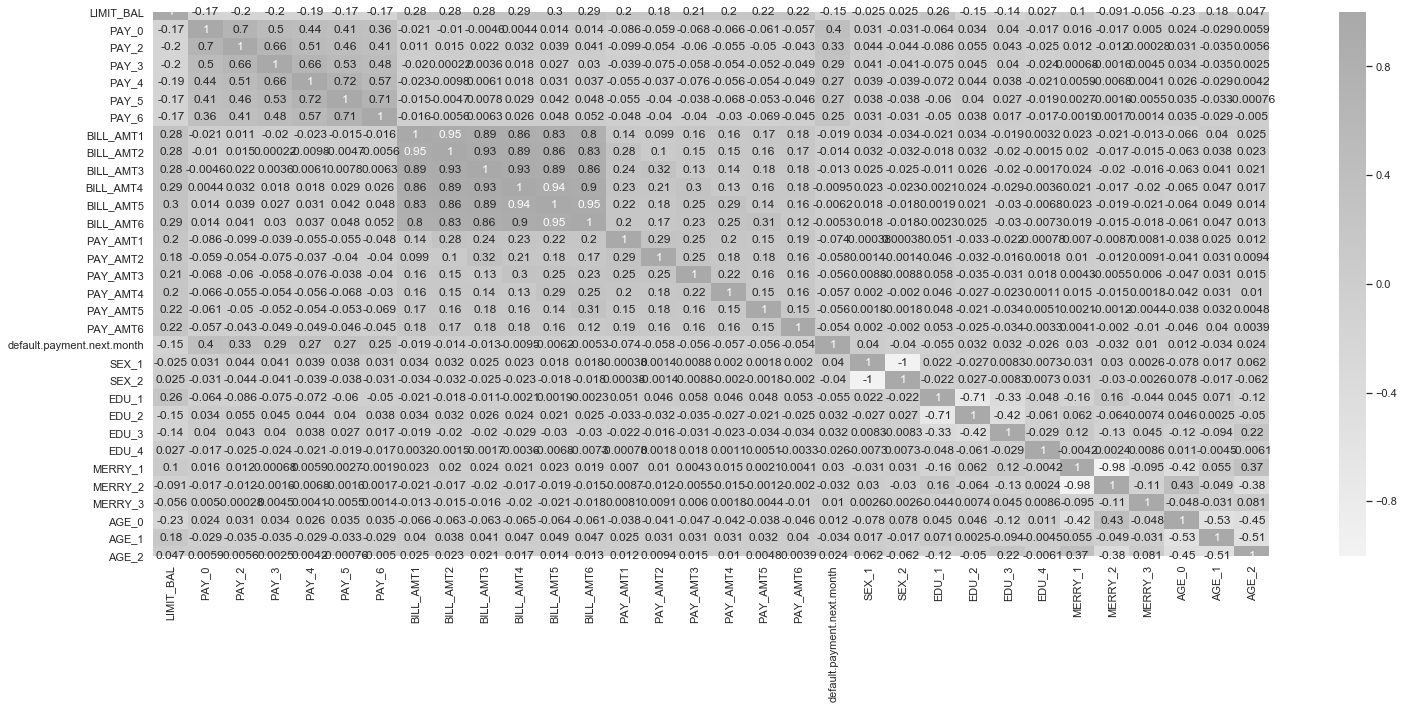

In [31]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (25,10)})
cmap = sns.light_palette("darkgray", as_cmap = True)
sns.heatmap(df_dummy.corr(), annot = True, cmap = cmap)
plt.show()

    StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환. (양쪽으로 나눈 분포 형태)
    RobustScaler(X): 중앙값(median)이 0, IQR(interquartile range)이 1이 되도록 변환.
    MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환 (정규분포 형태)
    MaxAbsScaler(X): 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환 (중앙에 밀집한 분포 형태)

In [32]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']] = scaler.fit_transform(df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']])

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']] = scaler.fit_transform(df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']])

In [117]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']] = scaler.fit_transform(df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']])

In [133]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']] = scaler.fit_transform(df_dummy[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']])

#### y값의 비율

In [34]:
print(sum(df_dummy['default.payment.next.month'] == 1),
      sum(df_dummy['default.payment.next.month'] == 0),
      df_dummy['default.payment.next.month'].count())

6605 22996 29601


In [35]:
print(6605/29601, 22996/29601)

0.2231343535691362 0.7768656464308639


In [36]:
# 층화추출
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 20190730)
for train_index, test_index in split.split(df_dummy, df_dummy['default.payment.next.month']):
    train_set = df_dummy.iloc[train_index]
    test_set = df_dummy.iloc[test_index]

In [37]:
test_set.shape

(5921, 32)

In [38]:
train_set.shape

(23680, 32)

In [39]:
y_train_set = train_set['default.payment.next.month']
x_train_set = train_set.drop(['default.payment.next.month'], axis=1)

y_test_set = test_set['default.payment.next.month']
x_test_set = test_set.drop(['default.payment.next.month'], axis=1)

### PAY부분은 살린 후 회귀분석

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 20190730)
lr.fit(x_train_set, y_train_set)
pred_y = lr.predict(x_test_set)

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
import statsmodels.api as sm
model_med = sm.Logit(y_train_set, x_train_set)
# Logit.from_formula로 R처럼 입력 가능
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.444258
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                23680
Model:                                  Logit   Df Residuals:                    23652
Method:                                   MLE   Df Model:                           27
Date:                        Wed, 31 Jul 2019   Pseudo R-squ.:                  0.1631
Time:                                09:14:30   Log-Likelihood:                -10520.
converged:                               True   LL-Null:                       -12571.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.1759      0.023     -7.662 

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [42]:
# 오즈비
print (np.exp(result_med.params))

LIMIT_BAL    0.838700
PAY_0        1.962373
PAY_2        1.010590
PAY_3        1.108696
PAY_4        1.077029
PAY_5        1.068944
PAY_6        1.124504
BILL_AMT1    0.896994
BILL_AMT2    1.196244
BILL_AMT3    1.051690
BILL_AMT4    1.042265
BILL_AMT5    1.054657
BILL_AMT6    0.865511
PAY_AMT1     0.840330
PAY_AMT2     0.803611
PAY_AMT3     0.970142
PAY_AMT4     0.959115
PAY_AMT5     0.977753
PAY_AMT6     0.967457
SEX_1        0.587335
SEX_2        0.514985
EDU_1        1.003454
EDU_2        1.005273
EDU_3        0.944088
EDU_4        0.317604
MERRY_1      0.728387
MERRY_2      0.597599
MERRY_3      0.694878
AGE_0        0.662557
AGE_1        0.648808
AGE_2        0.703625
dtype: float64


In [43]:
print("Misclassification samples : %d" % (y_test_set != pred_y).sum())

Misclassification samples : 1095


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test_set, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4600
           1       0.67      0.34      0.45      1321

    accuracy                           0.82      5921
   macro avg       0.75      0.65      0.67      5921
weighted avg       0.80      0.82      0.79      5921



In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print("accuracy: %.2f" %accuracy_score(y_test_set, pred_y))
print("Precision : %.3f" % precision_score(y_test_set, pred_y))
print("Recall : %3.f" % recall_score(y_test_set, pred_y))
print("F1 : %.3f" % f1_score(y_test_set, pred_y))

accuracy: 0.82
Precision : 0.667
Recall :   0
F1 : 0.452


#### PAY_2, BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6

     후진제거법을 통해 feature selection

In [46]:
x_train_set_sub = x_train_set.drop(['PAY_2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT1',
                                   'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis = 1)
x_test_set_sub = x_test_set.drop(['PAY_2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT1',
                                   'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis = 1)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 20190730)
lr.fit(x_train_set_sub, y_train_set)
pred_y = lr.predict(x_test_set_sub)

print(classification_report(y_test_set, pred_y))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4600
           1       0.67      0.34      0.45      1321

    accuracy                           0.82      5921
   macro avg       0.75      0.65      0.67      5921
weighted avg       0.80      0.82      0.79      5921



C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
model_med = sm.Logit(y_train_set, x_train_set_sub)
# Logit.from_formula로 R처럼 입력 가능
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.444531
         Iterations 8
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                23680
Model:                                  Logit   Df Residuals:                    23661
Method:                                   MLE   Df Model:                           18
Date:                        Wed, 31 Jul 2019   Pseudo R-squ.:                  0.1626
Time:                                09:14:39   Log-Likelihood:                -10526.
converged:                               True   LL-Null:                       -12571.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.1910      0.022     -8.506 

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


- 변수 제거 결과
    - 설명력 0.04차이 (16.30 -> 16.26)
    
      따라서 상당히 낮은 설명력을 가진 변수들을 확인할 수 있음
      
    - 약 16%의 설명력을 가졌다는 점을 통해 모형의 타당성이 유의하지 않음
    
    - f1 score의 경우 변수 제거 전과 후가 같음
    
      다음 달에 기본 지불 -> 아니오(0) : 0.89, 예(1) : 0.45
      
      1의 score가 낮게 나왔다는 점을 고려했을 때 8:2비율이 class 비율이 영향을 미친 것으로 판단
      
      아래에 smote를 통해 데이터를 증식해서 다시 로지스틱 회귀분석을 진행할 계획
      
    - accuracy의 경우 81% -> 다소 높은 정확도를 보임
    
    - PAY변수의 경우 시계열성 특징을 띔
    
      서열척도(상대적인 정보), 구간척도(숫자 간의 간격이 산술적 의미를 가짐)의 성격을 모두 가짐
      
      PAY_1~6 변수를 더미변수로 변환시 feature의 특성이 sparse해지고 분석에 큰 방해요인으로 작용할 확률이 큼
      
      따라서, 특성 그대로 사용하는 것이 옳다고 판단

- 해결 방안 추정
    - smote를 통해 binary형 종속변수의 비율을 동등하게 맞추어 분석한다.
    
    - p값이 nan이 나온 더미변수의 경우 종속변수와의 frequency plot을 통해 EDA 진행
    
      그 후 독립성 검정을 통해 종속변수를 포함한 변수 간 상관성을 비교
      
    - 추가 : 서로의 상관성이 높게 나왔던 BILL_AMT의 경우 상당수가 계수로써의 유의성이 낮아 회귀식에서 제거함
    
      따라서, PCA를 통해 새로운 매개변수를 도출 시도

    기존에 사용했던 4가지 scaler 대조 결과 StandardScaler를 사용한 결과만 정확도가 1% 향상하고
    ANOVA Table에서 nan값으로 나왔던 더미 변수들이 제대로 측정되어 나옴(나머지는 동등)
    하지만 계수의 유의성에 대한 p값이 1.0이 나와 종속변수에 유의한 영향을 미치지 않는다
    F1 score 또한 변화가 없음

### SMOTE 적용

In [123]:
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 0.2, kind = 'regular')

X_resampling, y_resampling = smote.fit_sample(df_dummy.drop(['default.payment.next.month'],axis=1),
                                              list(df_dummy['default.payment.next.month']))

In [124]:
print(X_resampling.shape, y_resampling.shape)
print(sum(y_resampling ==1), sum(y_resampling==0))

(39093, 31) (39093,)
16097 22996


In [125]:
resample_set = pd.DataFrame(X_resampling)

In [126]:
resample_set.columns = df_dummy.drop(['default.payment.next.month'],axis=1).columns

In [127]:
resample_set = resample_set.join(pd.DataFrame(y_resampling))

In [128]:
resample_set.columns = ['LIMIT_BAL',     'PAY_0',     'PAY_2',     'PAY_3',     'PAY_4',
           'PAY_5',     'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',  'PAY_AMT1',  'PAY_AMT2',
        'PAY_AMT3',  'PAY_AMT4',  'PAY_AMT5',  'PAY_AMT6',     'SEX_1',
           'SEX_2',     'EDU_1',     'EDU_2',     'EDU_3',     'EDU_4',
         'MERRY_1',   'MERRY_2',   'MERRY_3',     'AGE_0',     'AGE_1',
           'AGE_2',           'y']

In [129]:
# 층화추출
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 20190730)
for train_index, test_index in split.split(resample_set, resample_set['y']):
    train_set = resample_set.iloc[train_index]
    test_set = resample_set.iloc[test_index]

In [130]:
y_train_set = train_set['y']
x_train_set = train_set.drop(['y'], axis=1)

y_test_set = test_set['y']
x_test_set = test_set.drop(['y'], axis=1)

In [131]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 20190730)
lr.fit(x_train_set, y_train_set)
pred_y = lr.predict(x_test_set)

print(classification_report(y_test_set, pred_y))

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.73      0.87      0.79      4599
           1       0.74      0.53      0.62      3220

    accuracy                           0.73      7819
   macro avg       0.73      0.70      0.71      7819
weighted avg       0.73      0.73      0.72      7819



In [104]:
model_med = sm.Logit(y_train_set, x_train_set)
# Logit.from_formula로 R처럼 입력 가능
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.565085
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31274
Model:                          Logit   Df Residuals:                    31246
Method:                           MLE   Df Model:                           27
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.1659
Time:                        09:53:06   Log-Likelihood:                -17672.
converged:                       True   LL-Null:                       -21188.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.2079      0.017    -12.305      0.000      -0.241      -0.175
PAY_0          0.6350      0.

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [92]:
x_train_set_sub = x_train_set.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_2'], axis = 1)
x_test_set_sub = x_test_set.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_2'], axis = 1)

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 20190730)
lr.fit(x_train_set_sub, y_train_set)
pred_y = lr.predict(x_test_set_sub)

print(classification_report(y_test_set, pred_y))

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.66      0.84      0.74      4599
           1       0.78      0.56      0.65      4600

    accuracy                           0.70      9199
   macro avg       0.72      0.70      0.69      9199
weighted avg       0.72      0.70      0.69      9199



In [94]:
model_med = sm.Logit(y_train_set, x_train_set_sub)
# Logit.from_formula로 R처럼 입력 가능
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.577548
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                36793
Model:                          Logit   Df Residuals:                    36769
Method:                           MLE   Df Model:                           23
Date:                Wed, 31 Jul 2019   Pseudo R-squ.:                  0.1668
Time:                        09:50:43   Log-Likelihood:                -21250.
converged:                       True   LL-Null:                       -25503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL     -0.2053      0.015    -13.607      0.000      -0.235      -0.176
PAY_0          0.6534      0.

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


- SMOTE 돌린 결과
    - 1:1 비율
        - f1 score기준 0이 0.74, 1이 0.65, accuracy:70
    - y값이 1인 비율을 점차 줄일시
        - 0과 1의 f1 score가 명확한 trade-off관계를 보이며 1이 점차 낮아짐
        - accuracy는 증가하는 것을 볼 수 있음

## Random Forest

In [351]:
df_sub.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [349]:
# 층화추출
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 20190730)
for train_index, test_index in split.split(df_sub, df_sub['default.payment.next.month']):
    train_set = df_sub.iloc[train_index]
    test_set = df_sub.iloc[test_index]

In [350]:
train_set.shape, test_set.shape

((23680, 24), (5921, 24))

In [352]:
y_train_set = train_set['default.payment.next.month']
x_train_set = train_set.drop(['default.payment.next.month'], axis=1)

y_test_set = test_set['default.payment.next.month']
x_test_set = test_set.drop(['default.payment.next.month'], axis=1)

최적의 hyperparameter

    더미변수 사용시 200,3
    더미변수 미사용 99,3

In [353]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

np.random.seed(20190730)
tf.set_random_seed(20190730)

forest = RandomForestClassifier(n_estimators = 99, min_samples_leaf=3)
forest.fit(x_train_set, y_train_set)

y_pred = forest.predict(x_test_set)

print('accuracy :', metrics.accuracy_score(y_test_set, y_pred))

accuracy : 0.8204695152845803


18150    0
25227    0
6951     1
11454    0
20127    1
5731     0
28742    0
20938    0
26590    0
164      0
5366     0
22972    1
22372    0
27932    1
10501    0
23684    0
27479    0
9117     0
17509    0
8786     0
8249     1
20565    0
23393    0
24414    0
25865    0
14212    0
617      0
29263    0
626      0
1619     1
        ..
22320    0
6593     0
27426    0
9055     0
11894    0
1538     1
24084    0
16864    0
1523     1
21198    1
7649     0
17744    0
8340     1
6095     0
14228    0
6848     0
3070     0
29788    0
19523    0
11941    0
19328    1
24144    0
1048     0
17632    0
20538    0
1253     0
9933     1
24953    1
18993    0
12527    0
Name: default.payment.next.month, Length: 23680, dtype: int64

## DNN (keras)

    1. 데이터 표준화
        standard와 minmax대조 결과 미미하게 minmaxscaler가 더 좋은 성능을 보임

In [436]:
df_sub_scale = df_sub.copy()

In [438]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sub_scale[['LIMIT_BAL','SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']] = scaler.fit_transform(df_sub_scale[['LIMIT_BAL','SEX', 'EDUCATION','MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']])

In [429]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_sub_scale[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']] = scaler.fit_transform(df_sub_scale[['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6']])

In [439]:
# 층화추출
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 2, test_size = 0.2, random_state = 20190730)
for train_index, test_index in split.split(df_sub_scale, df_sub_scale['default.payment.next.month']):
    train_set = df_sub_scale.iloc[train_index]
    test_set = df_sub_scale.iloc[test_index]

In [440]:
y_train_set = train_set['default.payment.next.month']
x_train_set = train_set.drop(['default.payment.next.month'], axis=1)

y_test_set = test_set['default.payment.next.month']
x_test_set = test_set.drop(['default.payment.next.month'], axis=1)

    input 양식에 맞게 데이터 변환 과정

In [441]:
y_train_set = y_train_set.astype('float32')
y_test_set = y_test_set.astype('float32')

In [442]:
y_train_set = np.array(y_train_set).reshape(-1,1)
y_test_set = np.array(y_test_set).reshape(-1,1)

In [542]:
tf.set_random_seed(20190730)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
# glorot_uniform, glorot_normal, he
# model.add(Dense(84, activation = 'relu',init = 'glorot_uniform', input_shape = (23,)))
# model.add(Dropout(0.4))
model.add(Dense(84, activation = 'relu', input_shape = (23,)))
# model.add(Dropout(0.4))
# model.add(Dense(256, activation = 'relu',init = 'glorot_uniform'))
model.add(Dense(1, activation = 'sigmoid'))

# sgd, rmsprop, nadam
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train_set, y_train_set, epochs=10, batch_size = 185,
         validation_data = (x_test_set, y_test_set))


Train on 23680 samples, validate on 5921 samples
Epoch 1/10
23680/23680 [==============================] - 4s 159us/step - loss: 0.5259 - acc: 0.7697 - val_loss: 0.4715 - val_acc: 0.8092
Epoch 2/10
23680/23680 [==============================] - 1s 24us/step - loss: 0.4572 - acc: 0.8130 - val_loss: 0.4589 - val_acc: 0.8144
Epoch 3/10
23680/23680 [==============================] - 1s 24us/step - loss: 0.4472 - acc: 0.8166 - val_loss: 0.4556 - val_acc: 0.8171
Epoch 4/10
23680/23680 [==============================] - 1s 23us/step - loss: 0.4424 - acc: 0.8193 - val_loss: 0.4521 - val_acc: 0.8157
Epoch 5/10
23680/23680 [==============================] - 1s 23us/step - loss: 0.4394 - acc: 0.8195 - val_loss: 0.4513 - val_acc: 0.8171
Epoch 6/10
23680/23680 [==============================] - 1s 24us/step - loss: 0.4370 - acc: 0.8199 - val_loss: 0.4499 - val_acc: 0.8164
Epoch 7/10
23680/23680 [==============================] - 1s 24us/step - loss: 0.4357 - acc: 0.8215 - val_loss: 0.4482 - val_acc

In [532]:
# test_loss, test_acc = model.evaluate(x_test_set, y_test_set, verbose=0)
# print('test_acc:', test_acc)

test_acc: 0.8172605978719811


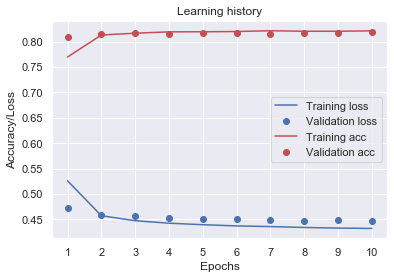

In [543]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Learning history')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

### 실험 과정 정리 및 결론

##### logistic regression
1. stats과 sklearn을 활용해 ANOVA Table의 결정계수 $R^2$, 변수별 유의검정, 모델 적합도를 확인하고, 종속변수 y의 class 0과 1 각각의 f1 score, accuracy를 확인
2. MinMax, MaxAbs, Standard, Robust scale을 비교한 결과 분포가 한쪽으로 치우친 데이터의 로지스틱 회귀분석에서는 standard scale이 가장 좋은 결과를 보임
2. accuracy는 82%를 보였지만, 종속변수의 class 비율에 따라 f1 score값이 상이해 SMOTE를 활용하여 비율을 맞추고 분석.
3. 그 결과 accuracy와 f1 score가 trade off 관계를 보임
(이는 데이터 특성에 따른 관계로 비추어짐. 즉, 일반화 가능성은 확인된 바 없음)
##### Random Forest
1. 데이터가 적은 특성에 따라 Neural Network을 사용하기 보다 머신러닝 기법을 활용한 분석을 채택
2. Decision Tree의 경우 직관적 해석이 가능하다는 장점을 보유하고 있으나, 성능면에서 Random Forest가 데이터와 변수를 다양하게 선택하여 특징 확인이 어려운 이 데이터에 더욱 적합할 것으로 판단.
3. Tree류의 경우 표준화의 영향이 미미하나 시행하였고, 그결과 각각 다른 인자를 입력해주어야 최상의 accuracy를 산출할 수 있었음.
##### DNN (keras 활용)
1. 데이터가 많아야 좋은 성능을 발휘한다는 말에 동의하나 경험해볼 필요가 있다고 생각
2. 기본 keras를 활용한 DNN을 활용하되 다양하게 튜닝을 시행
3. layer의 경우 최대 3층까지 적용해보았으나 층이 깊어질수록 연산 시간이 오래걸리고 정보력 손실 또한 이루어져 validation의 accuracy가 떨어지는 것을 확인.
4. activation function의 경우 relu를 default로 진행하였으며, -값이 있는 데이터의 정보을 보존하기 위해 elu를 사용하였지만, relu보다 accuracy의 진동폭이 불안정한 모습을 보임 (ex) 0.8118 - 0.8220 - 0.8002 epoch마다 이런식의 다소 큰 진동
5. weight의 initializer의 경우 he와 glorot의 normal, uniform을 적용해보고 relu가 he initializer와 조합이 좋아 기대한 부분이 있지만 glorot의 normal와 Xavier가 가장 우수한 결과를 보임
6. 결론적으로 DNN은 81.5%정도로 다른 분석 기법들의 82%라는 정확도보다 다소 약한 모습을 보임
##### 최종 결론
feature selection을 통해 일부 변수를 제거하기보다 모든 변수를 사용한 것이 더 좋은 결과를 도출하였고, 변수를 제거하기보다 데이터의 충분한 이해를 통해 각 변수의 곱 또는 나누거나 뺄셈 등을 통해 새로운 변수를 분석 feature로 생성하는 것이 성능 개선에 좋다고 판단.